# Создание сверточных сетей в Keras

---

**ФИО:** Волгин Алексей Дмитриевич
**№ варианта** 1
---

Keras

Задание: создать модель для решения задачи классификации с использованием фреймворка Keras.

В этой работе булем решать задачу классификации изображений с использованием фреймворка Keras.
В ноутбуке ниже приведен пример создания нейронной сети  для классификации картинок автосредств. (Ссылка на датасет в примере https://drive.google.com/file/d/1AQFPYEuY_rVH2aUTPP3l6lX_JPaqfdnr/view?usp=sharing )

В задании для самостоятельной разработки необходимо загрузить датасет по номеру варианта
 ###  1 вариант

https://drive.google.com/file/d/1u0QzfWlF5h6xwiPAijxHSkIv8K-Jgdvv/view?usp=sharing

 ###  2 вариант

 https://drive.google.com/file/d/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e/view?usp=sharing   
 для классификации марок изображений (3 класса), провести аугментацию, построить и обучить 3 архитектуры нейронной сети, выбрать лучшую, вывести архитектуру и проверить работу сети на собственных картинках.

In [5]:
%pip install gdown
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow import keras

import numpy as np

# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Основные слои
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Оптимизатор
from keras.optimizers import Adam

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Подключение модуля для загрузки данных из облака
import gdown

# Инструменты для работы с файлами
import os

# Отрисовка графиков
import matplotlib.pyplot as plt


# Рисование графиков в ячейках Colab
%matplotlib inline

import zipfile



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Загрузка датасета


gdown.download('https://drive.google.com/file/d/1u0QzfWlF5h6xwiPAijxHSkIv8K-Jgdvv', None, quiet=True)

C:\Users\aleks\AppData\Local\Programs\Python\Python312\Lib\site-packages\gdown\parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(


'1u0QzfWlF5h6xwiPAijxHSkIv8K-Jgdvv'

Загрузите архив с датасетом в среду выполнения и распакуйте архив

In [10]:
zip_path = '/content/V_1.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

FileNotFoundError: [Errno 2] No such file or directory: '/content/V_1.zip'

In [11]:
# Запишем путь к данным и создадим генераторы для обучающей и тестовой выборок

data_dir = '/content/V_1'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)



# Аугментация
# Увеличение базы изображений
для обучения решается путем использования встроенного механизма Keras - ImageDataGenerator.
Создание объекта класса ImageDataGenerator с необходимыми параметрами.
Параметры можно посмотреть в документации
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Ниже приведены основные параметры, которые могут вам понадобиться:
	rotation_range=0* Значение (в градусах) для выбора случайного поворота изображения.
	width_shift_range=0.0  Задает сдвиг по ширине.
	height_shift_range=0.0  Задает сдвиг по высоте.
	brightness_range=None  Задает диапазон выбора сдвига по яркости
	shear_range=0.0 Задает диапазон сдвига пикселей изображения (угол сдвига в градусах в направлении против часовой стрелки)
	zoom_range=0.0 Диапазон случайного выбора масштабирования изображения
  channel_shift_range=0.0 Диапазон случайного сдвига каналов




In [12]:
ROTATION_RANGE = 20
WIDTH_SHIFT_RANGE = 0.2
HEIGHT_SHIFT_RANGE = 0.2
ZOOM_RANGE = 0.2
BRIGHTNESS_RANGE = (0.5, 1.5)
HORIZONTAL_FLIP = True
VAL_SPLIT = 0.2


# Пример создания объекта класса ImageDataGenerator с необходимыми параметрами
train_datagen = ImageDataGenerator(
     rotation_range=ROTATION_RANGE,
     width_shift_range=WIDTH_SHIFT_RANGE,
     height_shift_range=HEIGHT_SHIFT_RANGE,
     zoom_range=ZOOM_RANGE,
     brightness_range=BRIGHTNESS_RANGE,
     horizontal_flip=HORIZONTAL_FLIP,
     validation_split=VAL_SPLIT,
     rescale=1. / 255
)
# Изображения для тестового набора только нормализуются
test_datagen = ImageDataGenerator(
     rescale=1. / 255.
)



Существует метод генератора - .flow_from_directory(), который помогает извлечь из папок изображения для генерации, посчитать классы и автоматически вычислить метки классов для изображений.



In [13]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '/content/V_1'

In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Имена классов:", class_names)

Имена классов: ['gatto', 'scoiattolo']


# model 1

In [ ]:
# Используем двумерные сверточные слои для обработки изображений
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Обучение модели
history =model.fit(train_generator, epochs=15, validation_data=validation_generator)

# Оценка модели
test_loss, test_acc = model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)

Epoch 1/15
89/89 [==============================] - 38s 401ms/step - loss: 1.0578 - accuracy: 0.5267 - val_loss: 0.6910 - val_accuracy: 0.6426
Epoch 2/15
89/89 [==============================] - 36s 403ms/step - loss: 0.6923 - accuracy: 0.5292 - val_loss: 0.6892 - val_accuracy: 0.4922
Epoch 3/15
89/89 [==============================] - 41s 456ms/step - loss: 0.6862 - accuracy: 0.5781 - val_loss: 0.6522 - val_accuracy: 0.6397
Epoch 4/15
89/89 [==============================] - 36s 404ms/step - loss: 0.6521 - accuracy: 0.6333 - val_loss: 0.6085 - val_accuracy: 0.6879
Epoch 5/15
89/89 [==============================] - 35s 389ms/step - loss: 0.6499 - accuracy: 0.6570 - val_loss: 0.7893 - val_accuracy: 0.5603
Epoch 6/15
89/89 [==============================] - 35s 396ms/step - loss: 0.6026 - accuracy: 0.6977 - val_loss: 0.5733 - val_accuracy: 0.6638
Epoch 7/15
89/89 [==============================] - 35s 396ms/step - loss: 0.5599 - accuracy: 0.7189 - val_loss: 0.5692 - val_accuracy: 0.7574

# Вывод графика точности

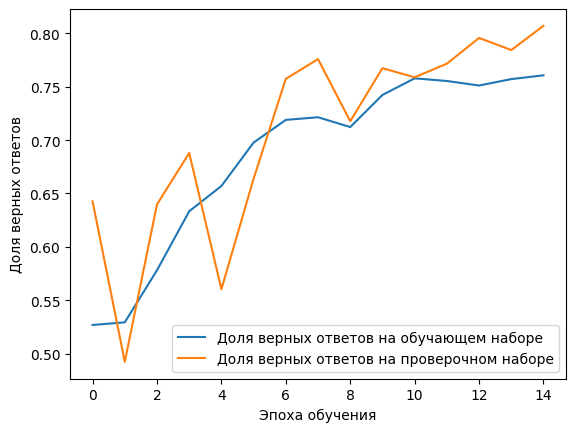

In [ ]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

При помощи кода, представленного ниже, можно вывести графики точности и ошибок

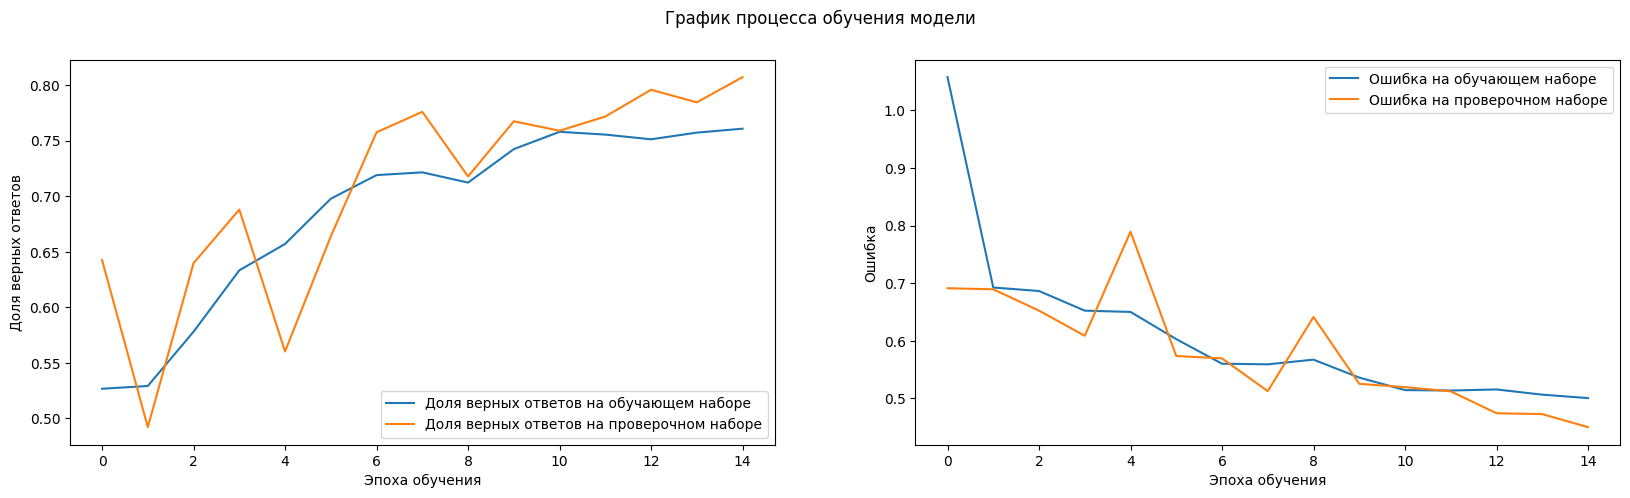

In [ ]:
 # Вывод графиков точности и ошибки
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['accuracy'],
           label='Доля верных ответов на обучающем наборе')
ax1.plot(history.history['val_accuracy'],
           label='Доля верных ответов на проверочном наборе')
ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля верных ответов')
ax1.legend()
ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
ax2.xaxis.get_major_locator().set_params(integer=True)
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()

На графике точности видим, что точность на валидационной выборке не увеличивается, а на графике ошибки - ошибка на валидационной выборке с количеством эпох тоже не уменьшается. Можно посмотреть, как будет идти процесс обучения и увеличить количество эпох обучения или же изменить архитектуру сети.

# 2 model

> Усложним архитектуру сети и проведем обучение



In [ ]:
# Используем двумерные сверточные слои для обработки изображений
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

# Оценка модели
test_loss, test_acc = model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)


Epoch 1/15
89/89 [==============================] - 98s 1s/step - loss: 0.7688 - accuracy: 0.5614 - val_loss: 1.1826 - val_accuracy: 0.4582
Epoch 2/15
89/89 [==============================] - 89s 991ms/step - loss: 0.7033 - accuracy: 0.5763 - val_loss: 0.7337 - val_accuracy: 0.5844
Epoch 3/15
89/89 [==============================] - 88s 989ms/step - loss: 0.6817 - accuracy: 0.6064 - val_loss: 0.7346 - val_accuracy: 0.5901
Epoch 4/15
89/89 [==============================] - 87s 976ms/step - loss: 0.6682 - accuracy: 0.6283 - val_loss: 0.6492 - val_accuracy: 0.6383
Epoch 5/15
89/89 [==============================] - 87s 978ms/step - loss: 0.6454 - accuracy: 0.6446 - val_loss: 0.6372 - val_accuracy: 0.6397
Epoch 6/15
89/89 [==============================] - 88s 982ms/step - loss: 0.6349 - accuracy: 0.6425 - val_loss: 1.2852 - val_accuracy: 0.5064
Epoch 7/15
89/89 [==============================] - 87s 975ms/step - loss: 0.6296 - accuracy: 0.6595 - val_loss: 0.6476 - val_accuracy: 0.6482
Ep

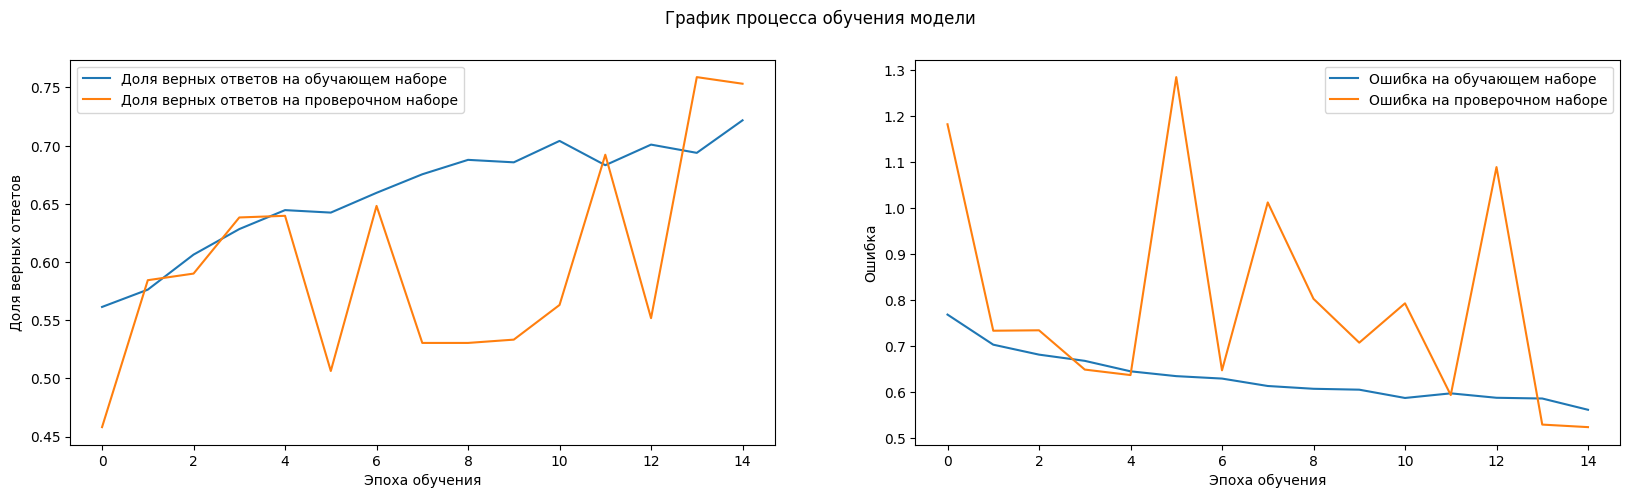

In [ ]:
# Вывод графиков точности и ошибки
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['accuracy'],
           label='Доля верных ответов на обучающем наборе')
ax1.plot(history.history['val_accuracy'],
           label='Доля верных ответов на проверочном наборе')
ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля верных ответов')
ax1.legend()
ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
ax2.xaxis.get_major_locator().set_params(integer=True)
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()

Ширина и высота (275, 183), количество каналов 3


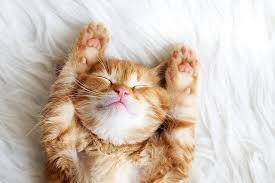

In [ ]:
from PIL import Image
img = Image.open('/content/cat1_1.jpg')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Открытие изображения
img = Image.open('/content/cat.jpg')
# Изменение размера изображения на 150x150 пикселей
img_resized = img.resize((150, 150))

# Преобразование изображения в массив numpy
img_array = image.img_to_array(img_resized)

# Нормализация значений пикселей
img_array /= 255.0

# Добавление измерения пакета (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Загрузка изображения в модель и получение предсказания
prediction = model.predict(img_array)

# Преобразование предсказания в читаемый формат
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Предсказанный класс:", predicted_class)

1/1 [==============================] - 0s 291ms/step
Предсказанный класс: gatto


3 model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

test_loss, test_acc = model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)

Epoch 1/15
89/89 [==============================] - 35s 372ms/step - loss: 0.9413 - accuracy: 0.6481 - val_loss: 0.5979 - val_accuracy: 0.6922
Epoch 2/15
89/89 [==============================] - 30s 337ms/step - loss: 0.5663 - accuracy: 0.7274 - val_loss: 0.5197 - val_accuracy: 0.7674
Epoch 3/15
89/89 [==============================] - 36s 401ms/step - loss: 0.5416 - accuracy: 0.7430 - val_loss: 0.5138 - val_accuracy: 0.7631
Epoch 4/15
89/89 [==============================] - 31s 354ms/step - loss: 0.5604 - accuracy: 0.7288 - val_loss: 0.5512 - val_accuracy: 0.7305
Epoch 5/15
89/89 [==============================] - 30s 336ms/step - loss: 0.5402 - accuracy: 0.7412 - val_loss: 0.5397 - val_accuracy: 0.7319
Epoch 6/15
89/89 [==============================] - 30s 337ms/step - loss: 0.5346 - accuracy: 0.7533 - val_loss: 0.4891 - val_accuracy: 0.7617
Epoch 7/15
89/89 [==============================] - 31s 349ms/step - loss: 0.5260 - accuracy: 0.7536 - val_loss: 0.5390 - val_accuracy: 0.7376

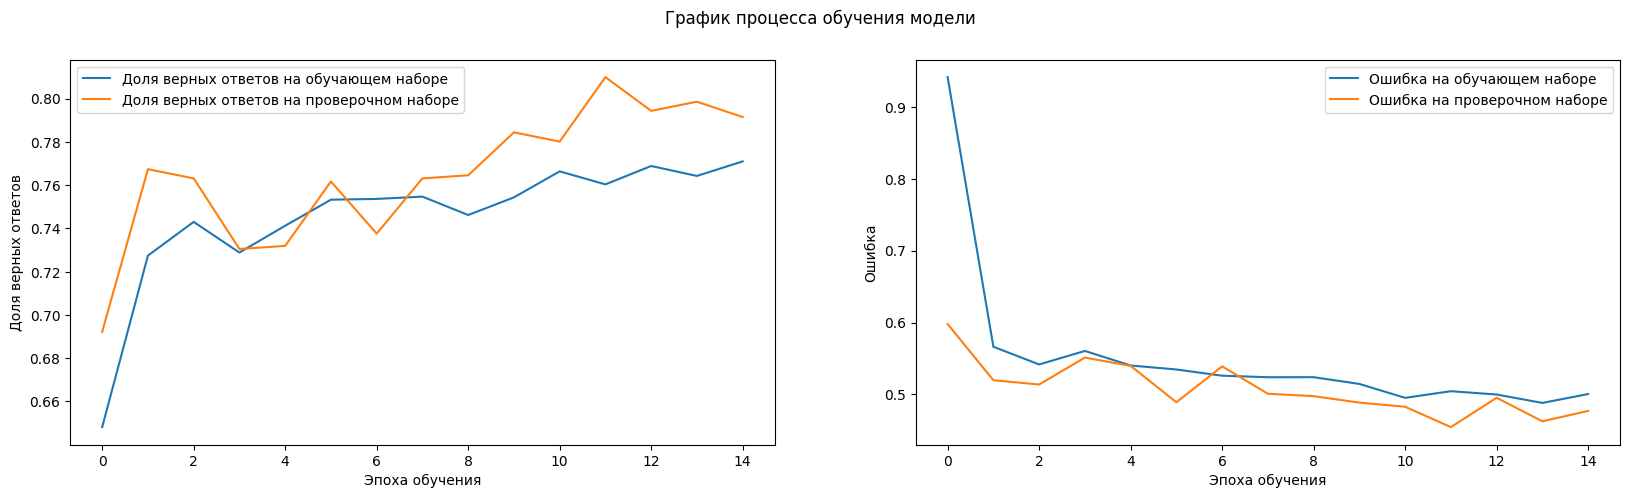

In [ ]:
# Вывод графиков точности и ошибки
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['accuracy'],
           label='Доля верных ответов на обучающем наборе')
ax1.plot(history.history['val_accuracy'],
           label='Доля верных ответов на проверочном наборе')
ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля верных ответов')
ax1.legend()
ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
ax2.xaxis.get_major_locator().set_params(integer=True)
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()

# Задание 1.
 Используя данные из варианта ( 3 класса), создайте 3 архитектуры сети, добейтесь точности распознавания не ниже 70% на обучающей выборке.

Для решения задачи вы можете использовать любой подход:

- модель без аугментации данных
- аугментация данных с помощью ImageDataGenerator



## Порядок выполнения

1. Загрузить датасет ____.zip для решения задачи классификации.
2. Провести предобработку данных с использованием  аугментации для обучающей и валидационной выборок.
3. Создать 3 архитектуры сети.
4. Обучите сеть и выведите графики точности и ошибок на тренировочной и валидационной выборках. Добейтесь точности 70% на обучающей выборке.
5. Оценить результаты точности лучшей модели на тестовой выборке.
6. Загрузите файлы с картинками из интернета или создайте свои фотографии.
Проверьте работу сети на собственных картинках.

*** ВОПРОСЫ ***

1. Для чего используется аугментация.

Расширение обучающего набора данных:
   Увеличивая разнообразие данных путем аугментации, можно создать дополнительные варианты изображений, что помогает улучшить обучение модели на более разнообразных примерах.

Повышение устойчивости модели:
   Аугментация позволяет модели стать устойчивее к разнообразным вариациям входных данных, таким как изменения ракурса, освещения, масштаба и т. д. Это способствует обучению модели, которая лучше обобщает и работает на новых данных.

Профилактика переобучения:
   Использование аугментации позволяет предотвратить сверхобучение модели за счет введения дополнительной вариативности в обучающие данные. Модель, обученная на расширенном наборе данных, будет лучше обобщать и не так сильно ориентироваться на специфические детали обучающих примеров.

Балансировка классов:
   Если в обучающем наборе данных наблюдается дисбаланс классов, аугментация может помочь сгенерировать дополнительные примеры для недопредставленных классов, обеспечивая более равномерное освещение всех классов в обучающем наборе.
2. Какие параметры ImageDataGenerator вы использовали для создания обучающей выборки.
1. ROTATION_RANGE = 20:
   - Вращение изображений на 20 градусов в обе стороны позволяет добавить вариативность, не искажая сильно изображения.
   - Это довольно стандартное значение, которое часто используется для аугментации изображений.

2. WIDTH_SHIFT_RANGE = 0.2, HEIGHT_SHIFT_RANGE = 0.2:
   - Сдвиг изображения на 20% ширины и высоты может помочь модели обобщать признаки, независимо от местоположения объектов на изображении.
   - Это распространенное значение, которое позволяет достаточную вариативность, не приводя к значительным искажениям.

3. ZOOM_RANGE = 0.2:
   - Масштабирование изображений в диапазоне от 0.8 до 1.2 (20% увеличение или уменьшение) добавляет вариативность в размер объектов.
   - Это помогает модели обучаться распознавать объекты разных размеров.

4. BRIGHTNESS_RANGE = (0.5, 1.5):
   - Изменение яркости изображений в диапазоне от 50% до 150% помогает модели обучаться распознавать объекты при разной освещенности.
   - Это значение является довольно распространенным и не вносит сильных искажений.

5. HORIZONTAL_FLIP = True:
   - Горизонтальное отражение изображений добавляет еще один вид вариативности, который полезен, если объекты могут встречаться с разных сторон.

6. VAL_SPLIT = 0.2:
   - Разделение данных на обучающую (80%) и валидационную (20%) выборки - довольно стандартное соотношение.
   - Это позволяет оценивать качество обучения модели на валидационной выборке во время тренировки.

3. Выведите лучшую архитектуру нейронной сети и обьясните какие блоки вы использовали (слои).

***Ваш ответ***
Данная упрощенная модель состоит из следующих блоков (слоев):

Conv2D: Слой свертки, который используется для извлечения признаков из изображений. Здесь мы используем 64 фильтра размером 3x3, и функцию активации ReLU.

MaxPooling2D: Слой пулинга, который уменьшает пространственные размеры предыдущего слоя, путем выбора наибольшего значения из квадратных регионов. Это помогает уменьшить количество параметров и вычислений.

Flatten: Слой, который преобразует многомерный вход в одномерный вектор. Необходим для передачи данных с выхода сверточных слоев к плотным слоям.

Dense: Полносвязный плотный слой. Здесь используются два таких слоя: один с 32 нейронами и функцией активации ReLU, а другой с 2 нейронами на выходе (количество классов) и функцией активации softmax для задачи классификации.

Эти слои используются для создания модели, которая способна извлекать признаки из изображений с помощью сверточных операций и классифицировать их с помощью плотных слоев.

In [ ]:
#
# Ваш код
#

4. По графикам потерь и метрике сделайте вывод была ли модель обучена, недообучена или переобучена.
***Ваш ответ*** недообучена
